# 華僑旅客人數與外籍旅客人數的回歸分析

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

資料取自政府資料開放平台

In [2]:
df = pd.read_csv('https://gis.taiwan.net.tw/od/01_PRD/%E6%AD%B7%E5%B9%B4%E4%BE%86%E5%8F%B0%E6%97%85%E5%AE%A2%E7%B5%B1%E8%A8%88.csv'
                 , encoding = 'big5')

In [3]:
df.head()

,年別,總計人數,總計成長率,總計指數,外籍旅客人數,外籍旅客成長率,外籍旅客占總計百分比,華僑旅客人數,華僑旅客成長率,華僑旅客占總計百分比
0,1956,"14,974",-,0.81,"11,734",-,78.36,"3,240",-,21.64
1,1957,"18,159",21.27,0.98,"14,068",19.89,77.47,"4,091",26.27,22.53
2,1958,"16,709",-7.99,0.90,"15,557",10.58,93.11,"1,152",-71.84,6.89
3,1959,"19,328",15.67,1.04,"17,634",13.35,91.24,"1,694",47.05,8.76
4,1960,"23,636",22.29,1.27,"20,796",17.93,87.98,"2,840",67.65,12.02


In [4]:
import locale

locale.setlocale(locale.LC_NUMERIC, '')
df1 = df['外籍旅客人數'].apply(locale.atoi)
df2 = df['華僑旅客人數'].apply(locale.atoi)

In [5]:
dff = pd.concat([df2, df1], axis = 1)

In [6]:
dff.head()

,華僑旅客人數,外籍旅客人數
0,3240,11734
1,4091,14068
2,1152,15557
3,1694,17634
4,2840,20796


In [7]:
x = np.array(df2)
y = np.array(df1)

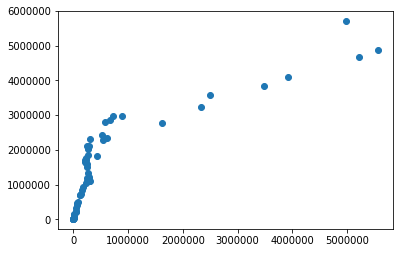

In [8]:
plt.scatter(x, y)

根據上圖可以看出，華僑旅客人數與外籍旅客人數有正相關，然而似乎非線性，以下是利用線性回歸得到的結果。

In [9]:
regr = LinearRegression()

In [10]:
X = x.reshape(len(x), 1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 404)

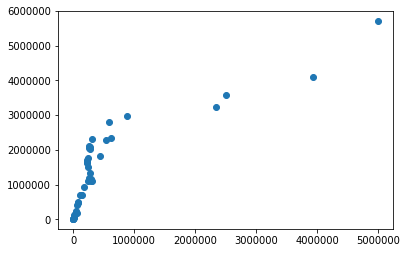

In [12]:
plt.scatter(x_train, y_train)

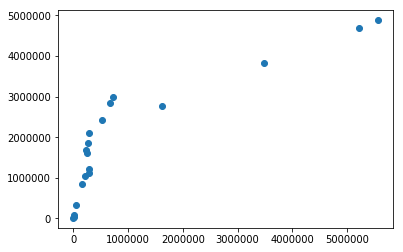

In [13]:
plt.scatter(x_test, y_test)

In [14]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
Y_pred = regr.predict(x_test)

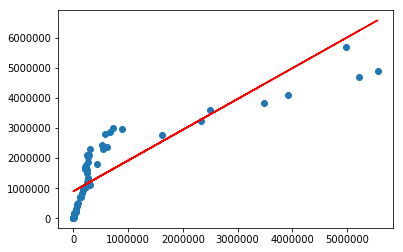

In [16]:
plt.scatter(x, y)
plt.plot(x_test, Y_pred, 'r')

紅線為線性回歸所得的回歸線。

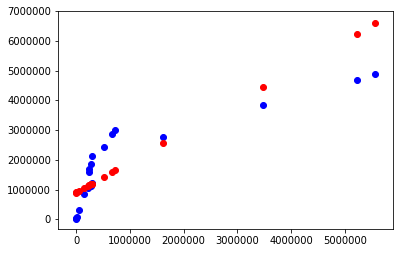

In [17]:
plt.scatter(x_test, y_test, c = 'b')
plt.scatter(x_test, Y_pred, c = 'r')

紅點為訓練後所得的答案，而藍點則為真正答案，可見若用線性方式預估，還是有蠻大落差的。

然而若是觀察資料，可以發現其散布圖似乎可以用對數函數的圖形去模擬，因此以下是將資料取對數後再做線性回歸的結果。

In [18]:
x1 = np.log(x)

In [19]:
y1 = np.log(y)

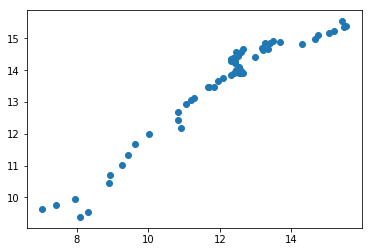

In [20]:
plt.scatter(x1, y1)

由上圖可以發現資料的分布方式似乎變得更線性了。

In [21]:
X1 = x1.reshape(len(x1), 1)

In [22]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 404)

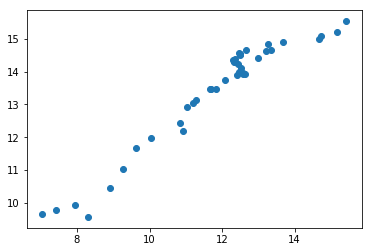

In [23]:
plt.scatter(x1_train, y1_train)

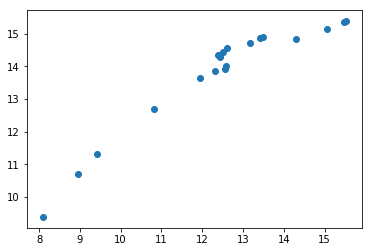

In [24]:
plt.scatter(x1_test, y1_test)

In [25]:
regr.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
Y1_pred = regr.predict(x1_test)

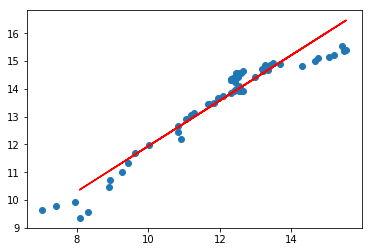

In [27]:
plt.scatter(x1, y1)
plt.plot(x1_test, Y1_pred, 'r')

紅線為線性回歸所得的回歸線。

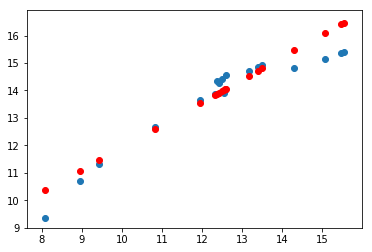

In [28]:
plt.scatter(x1_test, y1_test)
plt.scatter(x1_test, Y1_pred, c = 'r')

紅點為訓練後所得的答案，而藍點則為真正答案，在這個案例中，將資料轉成對數似乎能做更貼切的預估。